<a href="https://colab.research.google.com/github/akujeeez/CSS145---Data-Science-Project---Group-8/blob/main/CSS145_Proposal_2Project_Group_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Number: 8

Section: BM7

Group Members:
- Acosta, John Paolo Miguel
- Gonzales, Dave Justine
- Perez, Ashton Miguel
- Rupisan, Anthony James



In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.7 MB/s eta 0:00:00


In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import os
from sklearn.preprocessing import LabelEncoder
import altair as alt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import json
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor


from scipy.stats import zscore
from pmdarima import auto_arima

from sklearn.metrics import mean_absolute_error



In [ ]:
csv_files = [
    '/root/.cache/kagglehub/datasets/gyejr95/league-of-legendslol-ranked-games-2020-ver1/versions/4/challenger_match.csv',
    '/root/.cache/kagglehub/datasets/gyejr95/league-of-legendslol-ranked-games-2020-ver1/versions/4/match_data_version1.csv',
    '/root/.cache/kagglehub/datasets/gyejr95/league-of-legendslol-ranked-games-2020-ver1/versions/4/match_loser_data_version1.csv',
    '/root/.cache/kagglehub/datasets/gyejr95/league-of-legendslol-ranked-games-2020-ver1/versions/4/match_winner_data_version1.csv'
]

dataframes = [pd.read_csv(file) for file in csv_files]

# Display data
for i, df in enumerate(dataframes):
    print(f"Data # {i + 1}:")
    print(df)
    print("\n")


Data # 1:
       Unnamed: 0      gameId  season         role    lane  \
0               0  4260630568      13  DUO_SUPPORT  BOTTOM   
1               1  4260452798      13          DUO     TOP   
2               2  4260353406      13         SOLO     MID   
3               3  4260272376      13         SOLO     TOP   
4               4  4260082928      13         SOLO     MID   
...           ...         ...     ...          ...     ...   
29995          95  4222879292      13  DUO_SUPPORT  BOTTOM   
29996          96  4222613796      13  DUO_SUPPORT  BOTTOM   
29997          97  4222481428      13          DUO    NONE   
29998          98  4221929785      13    DUO_CARRY  BOTTOM   
29999          99  4221027646      13  DUO_SUPPORT    NONE   

                                             accountId  
0      IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
1      IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
2      IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
3      IIWG7FRiqE

In [ ]:
import pandas as pd
# Load the challenger match data for initial analysis
challenger_df = pd.read_csv('/root/.cache/kagglehub/datasets/gyejr95/league-of-legendslol-ranked-games-2020-ver1/versions/4/challenger_match.csv')

# Display the first few rows and basic info about the challenger dataset
print(challenger_df.head())  # View the first few rows
print(challenger_df.info())  # Get a summary of columns, types, and null values

# Load the 'match_data_version1.csv' dataset
match_data_df = pd.read_csv('/root/.cache/kagglehub/datasets/gyejr95/league-of-legendslol-ranked-games-2020-ver1/versions/4/match_data_version1.csv')

# Display the first few rows and basic info about the dataset
print(match_data_df.head())
print(match_data_df.info())



   Unnamed: 0      gameId  season         role    lane  \
0           0  4260630568      13  DUO_SUPPORT  BOTTOM   
1           1  4260452798      13          DUO     TOP   
2           2  4260353406      13         SOLO     MID   
3           3  4260272376      13         SOLO     TOP   
4           4  4260082928      13         SOLO     MID   

                                         accountId  
0  IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
1  IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
2  IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
3  IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
4  IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   gameId      30000 non-null  int64 
 2   season      30000 non-null  int64 
 3   role        30000 no

In [ ]:
match_winner_data = pd.read_csv('/content/match_winner_data_version1.csv')
match_losser_data = pd.read_csv('/content/match_loser_data_version1.csv')

print(match_winner_data.head())
print(match_losser_data.head())

   Unnamed: 0  teamId  win  firstBlood  firstTower  firstInhibitor  \
0           0     200  Win       False        True            True   
1           1     100  Win       False       False           False   
2           2     200  Win        True        True            True   
3           3     200  Win        True        True           False   
4           4     100  Win        True        True            True   

   firstBaron  firstDragon  firstRiftHerald  towerKills  inhibitorKills  \
0       False         True             True           9               1   
1       False         True             True           4               0   
2       False         True             True           5               1   
3       False        False             True           6               0   
4        True         True             True          11               3   

   baronKills  dragonKills  vilemawKills  riftHeraldKills  \
0           0            3             0                2   
1     

In [ ]:
# Check for missing values
missing_values = challenger_df.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
Unnamed: 0    0
gameId        0
season        0
role          0
lane          0
accountId     0
dtype: int64


In [ ]:
# Summary statistics for numerical columns
descriptive_stats = challenger_df.describe()
print("Descriptive statistics for numerical columns:")
print(descriptive_stats)


Descriptive statistics for numerical columns:
         Unnamed: 0        gameId   season
count  30000.000000  3.000000e+04  30000.0
mean      49.500000  4.223157e+09     13.0
std       28.866551  3.052917e+07      0.0
min        0.000000  4.083343e+09     13.0
25%       24.750000  4.211492e+09     13.0
50%       49.500000  4.229364e+09     13.0
75%       74.250000  4.245659e+09     13.0
max       99.000000  4.261026e+09     13.0


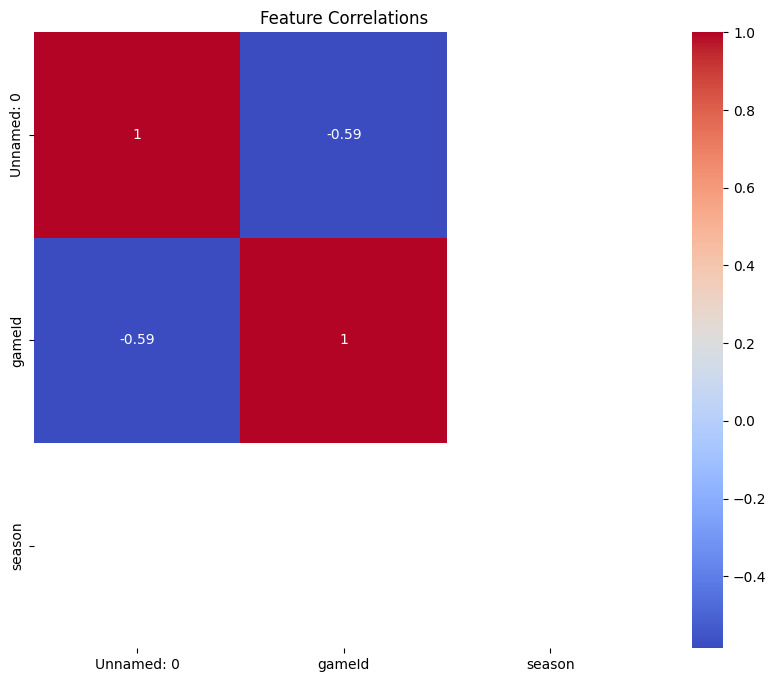

In [ ]:
numerical_features = challenger_df.select_dtypes(include=['number']).columns
numerical_df = challenger_df[numerical_features]

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

A heatmap that shows the relationship between the challenger_df DataFrame's numerical attributes. For the numerical features, it computes the correlation matrix after choosing columns with numerical data types. In order to display the correlation values in each cell, sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm") is used to construct the heatmap graphic. The "coolwarm" color map setting is used to show whether there is a positive or negative link. To improve readability, figsize=(10, 8) is used to present the plot.

<br>

A heatmap can be used to determine whether properties, like multicollinearity, may be redundant because of strong correlation. In a predictive model, correlations aid in the selection of features since strongly linked data may offer duplicate information and may be removed or transformed. high negative correlations, near-zero correlations, and high positive correlations are all displayed in the heatmap.

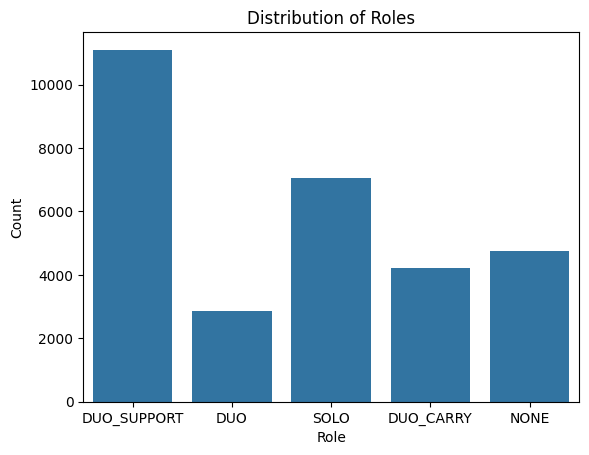

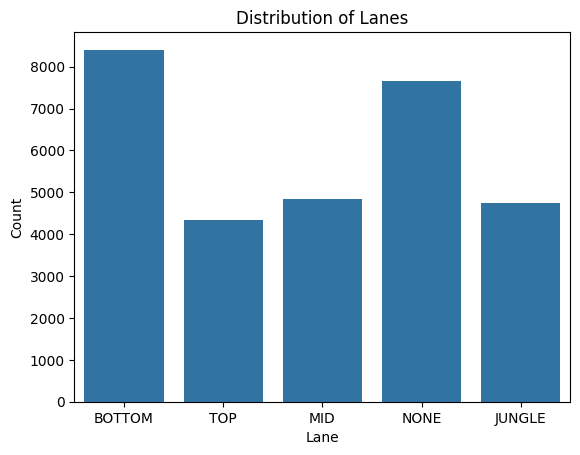

In [ ]:
sns.countplot(data=challenger_df, x='role')
plt.xlabel('Role')
plt.ylabel('Count')
plt.title('Distribution of Roles')
plt.show()

# Plotting the lane distribution
sns.countplot(data=challenger_df, x='lane')
plt.xlabel('Lane')
plt.ylabel('Count')
plt.title('Distribution of Lanes')
plt.show()

To see the distribution of role and lane categories within the challenger_df DataFrame that which most likely contains data from the League of Legends dataset that the code blocks create count charts. Different player roles' frequency in the dataset is indicated by the first figure, which counts and shows the number of observations for each distinct value in the role column. How frequently certain lanes are represented in the data is displayed in the second figure, which displays the distribution of the lane column.

<br>

Role distribution has a high number for support and AD carry would indicate a greater emphasis on bot lane dynamics and lane distribution that a high number for mid-lane or jungle might signal their significance in strategic gameplay that are two examples of observations. Equal distribution across lanes is suggested by a balanced distribution, however imbalances may point to meta trends in which particular lanes are prioritized for high-impact plays.


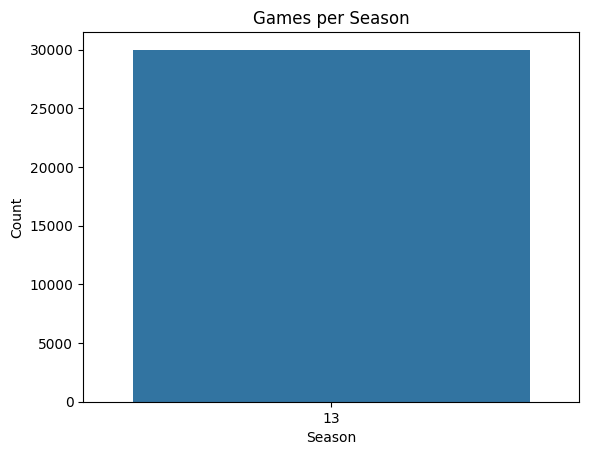

In [ ]:
sns.countplot(data=challenger_df, x='season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Games per Season')
plt.show()

The seasons are shown on the x-axis, and "Count" is written on the y-axis. A brief visual examination of the quantity of games recorded for each season in the dataset is then provided by the plot, which is subsequently generated. Finding trends, figuring out the distribution of data, and researching variations in player behavior or game meta over time can all benefit from this.

<br>

While low counts point to possible gaps in data collection or limited data availability, high counts show more games were played or recorded throughout specific seasons. Consistent gameplay or data collecting throughout time is indicated by a balanced distribution. For temporal studies or training models that take into consideration season-based gaming differences, this graphic offers insight into the many seasons that are well-represented in the dataset.

In [ ]:
# Check unique gameId and accountId counts
print("Unique game IDs:", challenger_df['gameId'].nunique())
print("Unique account IDs:", challenger_df['accountId'].nunique())

# Check for duplicate rows
duplicates = challenger_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Unique game IDs: 12651
Unique account IDs: 300
Number of duplicate rows: 0


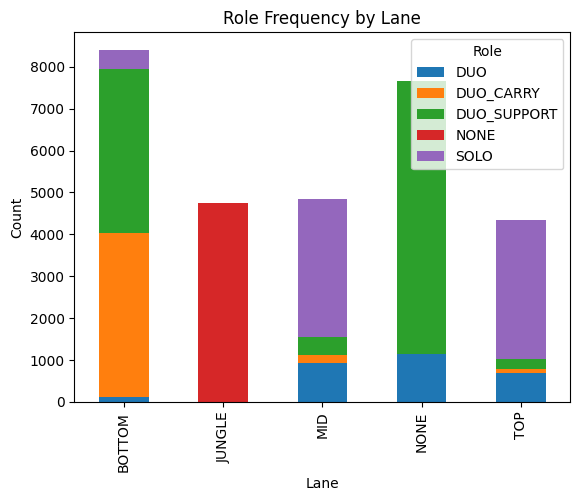

In [ ]:
# Frequency of roles by lane
role_lane_counts = challenger_df.groupby(['lane', 'role']).size().unstack()
role_lane_counts.plot(kind='bar', stacked=True)
plt.xlabel('Lane')
plt.ylabel('Count')
plt.title('Role Frequency by Lane')
plt.legend(title='Role')
plt.show()


To create a stacked bar chart to display the challenger_df DataFrame's player role distribution across several lanes. In League of Legends, where roles and lanes are essential elements of gameplay, this is especially pertinent. Plotting a stacked bar chart with each bar representing the number of distinct roles within a lane is done by the code snippet after grouping the data by lane and role using the unstack() technique.

<br>

Three major lanes—top, middle (mid), and bottom (bot) as well as the jungle area constitute the traditional League of Legends environment. Players can select from a variety of positions, each linked to distinct gameplay techniques and goals, including Top, Jungler, Mid, ADC (Attack Damage Carry), and Support.


<br>

With stacked bar segments signifying the number of a specific role in that lane and overall bar height reflecting the total number of games or instances in which that lane was played, the visualization displays the distribution of roles throughout each lane. This knowledge aids in evaluating well-liked tactics and role allocations in elite play, as well as determining the best team makeup.

<br>

Players, analysts, and coaches that wish to research trends and improve tactics based on role distributions can benefit from data-driven decision-making.

In [ ]:
file_path = '/content/challenger_match.csv'  # Replace with the actual path to your CSV file
challenger_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
challenger_df.head()

,Unnamed: 0,gameId,season,role,lane,accountId
0,0,4260630568,13,DUO_SUPPORT,BOTTOM,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
1,1,4260452798,13,DUO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
2,2,4260353406,13,SOLO,MID,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
3,3,4260272376,13,SOLO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
4,4,4260082928,13,SOLO,MID,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo


In [ ]:
challenger_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
29995,False
29996,False
29997,False
29998,False


In [ ]:
challenger_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   gameId      30000 non-null  int64 
 2   season      30000 non-null  int64 
 3   role        30000 non-null  object
 4   lane        30000 non-null  object
 5   accountId   30000 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.4+ MB


In [ ]:
challenger_df.isnull().sum()

,0
Unnamed: 0,0
gameId,0
season,0
role,0
lane,0
accountId,0


In [ ]:
challenger_df = challenger_df.dropna()
challenger_df.head()

,Unnamed: 0,gameId,season,role,lane,accountId
0,0,4260630568,13,DUO_SUPPORT,BOTTOM,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
1,1,4260452798,13,DUO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
2,2,4260353406,13,SOLO,MID,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
3,3,4260272376,13,SOLO,TOP,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo
4,4,4260082928,13,SOLO,MID,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo


In [ ]:
challenger_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   gameId      30000 non-null  int64 
 2   season      30000 non-null  int64 
 3   role        30000 non-null  object
 4   lane        30000 non-null  object
 5   accountId   30000 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.4+ MB


In [ ]:
# Get unique values in 'role'
print("Unique Roles:", challenger_df['role'].unique())

# Get unique values in 'lane'
print("Unique Lanes:", challenger_df['lane'].unique())

# Get unique values in 'season'
print("Unique Seasons:", challenger_df['season'].unique())


Unique Roles: ['DUO_SUPPORT' 'DUO' 'SOLO' 'DUO_CARRY' 'NONE']
Unique Lanes: ['BOTTOM' 'TOP' 'MID' 'NONE' 'JUNGLE']
Unique Seasons: [13]


In [ ]:
# Display column names and data types to identify numeric columns
print("Columns in match_data_version1.csv:", match_data_df.columns)
print("\nData Types:\n", match_data_df.dtypes)


Columns in match_data_version1.csv: Index(['Unnamed: 0', 'gameCreation', 'gameDuration', 'gameId', 'gameMode',
       'gameType', 'gameVersion', 'mapId', 'participantIdentities',
       'participants', 'platformId', 'queueId', 'seasonId', 'status.message',
       'status.status_code'],
      dtype='object')

Data Types:
 Unnamed: 0                 int64
gameCreation             float64
gameDuration             float64
gameId                   float64
gameMode                  object
gameType                  object
gameVersion               object
mapId                    float64
participantIdentities     object
participants              object
platformId                object
queueId                  float64
seasonId                 float64
status.message           float64
status.status_code       float64
dtype: object


gameDuration
912.0     267
913.0     255
914.0     240
915.0     236
1210.0    236
         ... 
3315.0      1
2727.0      1
3013.0      1
2783.0      1
2602.0      1
Name: count, Length: 2488, dtype: int64
Match with the highest duration:
Unnamed: 0                                                               0
gameCreation                                               1581096459726.0
gameDuration                                                        3473.0
gameId                                                        4137700090.0
gameMode                                                           CLASSIC
gameType                                                      MATCHED_GAME
gameVersion                                                  10.3.307.1028
mapId                                                                 11.0
participantIdentities    [{'participantId': 1, 'player': {'platformId':...
participants             [{'participantId': 1, 'teamId': 100, 'champion...
platformId

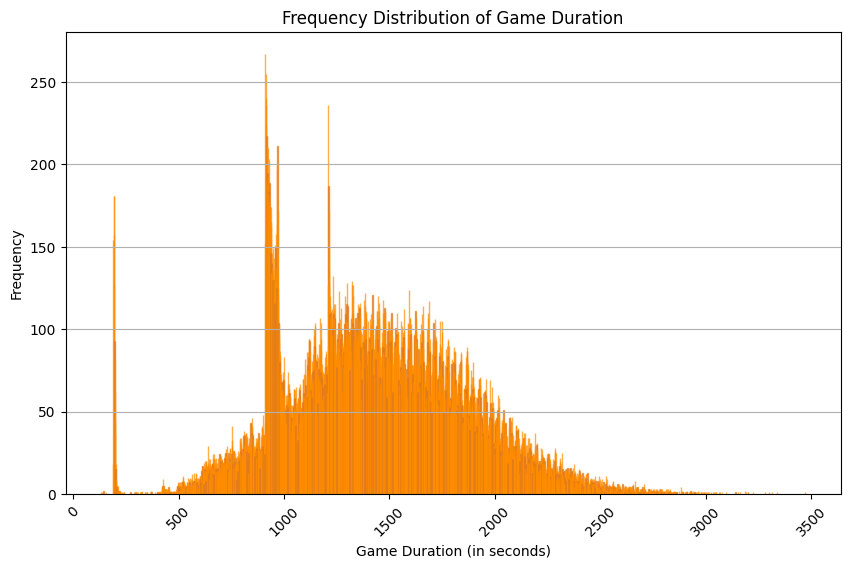

In [ ]:
# Assuming 'match_data_df' is already loaded
# Convert 'gameDuration' to numeric (in case of invalid data)
match_data_df['gameDuration'] = pd.to_numeric(match_data_df['gameDuration'], errors='coerce')

# Check the distribution of game durations
duration_counts = match_data_df['gameDuration'].value_counts()

# Print the counts of different durations
print(duration_counts)

# Find the match with the highest game duration
highest_duration_row = match_data_df.loc[match_data_df['gameDuration'].idxmax()]
print("Match with the highest duration:")
print(highest_duration_row)

# Plotting the frequency distribution of game durations
plt.figure(figsize=(10, 6))
plt.bar(duration_counts.index, duration_counts.values, color='blue', alpha=0.7, edgecolor='darkorange')
plt.title('Frequency Distribution of Game Duration')
plt.xlabel('Game Duration (in seconds)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The distribution of game durations from the match_data_df DataFrame, which might include League of Legends match information, is analyzed and visualized by this code block. The code computes the distribution of game durations, turns the gameDuration column into a numeric value, and uses idxmax() to identify the match with the longest duration. After that, the code generates a bar plot of the frequency distribution that displays the frequency of matches with varying lengths as well as the printed counts.

<br>

A bar chart that displays the frequency of matches of various durations and printed counts that show the frequency of each game time in the dataset are examples of observations and interpretations. While outliers, like extremely short or long durations, may suggest special match conditions, peaks in the distribution might reflect average game lengths.

<br>

Performance measurements, outlier identification, and gameplay analysis can all benefit from this representation. This data can be used by analysts and players to determine the most typical game lengths and modify their tactics appropriately. Extremely short or long matches are examples of outliers that may indicate abnormalities, bugs, or special match circumstances. All things considered, this code block offers insightful information about how League of Legends game lengths are distributed.

In [ ]:
# Assuming 'match_data_df' is already loaded
unique_game_modes = match_data_df['gameMode'].unique()

# Display the unique game modes
print(unique_game_modes)


['CLASSIC' 'ARAM' 'ONEFORALL' 'URF' 'TUTORIAL_MODULE_3'
 'TUTORIAL_MODULE_1' 'KINGPORO' 'TUTORIAL_MODULE_2']


In [ ]:
# Assuming you want to analyze 'gameDuration' instead of 'IMDb score' for match data

# Count the unique values in 'gameDuration'
game_duration_counts = match_data_df['gameDuration'].value_counts()
print(game_duration_counts)

# Round the 'gameDuration' values and create a new column 'gameDuration_Rounded'
match_data_df['gameDuration_Rounded'] = match_data_df['gameDuration'].round()
print(match_data_df['gameDuration_Rounded'])


gameDuration
912.0     267
913.0     255
914.0     240
915.0     236
1210.0    236
         ... 
3315.0      1
2727.0      1
3013.0      1
2783.0      1
2602.0      1
Name: count, Length: 2488, dtype: int64
0         1323.0
1         1317.0
2          932.0
3         2098.0
4         2344.0
           ...  
108824    1029.0
108825    1544.0
108826    2090.0
108827    1382.0
108828    1432.0
Name: gameDuration_Rounded, Length: 108829, dtype: float64


In [ ]:
# Check the unique values in the 'gameDuration_Rounded' column
unique_game_durations = match_data_df['gameDuration_Rounded'].unique()
print(unique_game_durations)


[1323. 1317.  932. ... 2994.  288. 2602.]


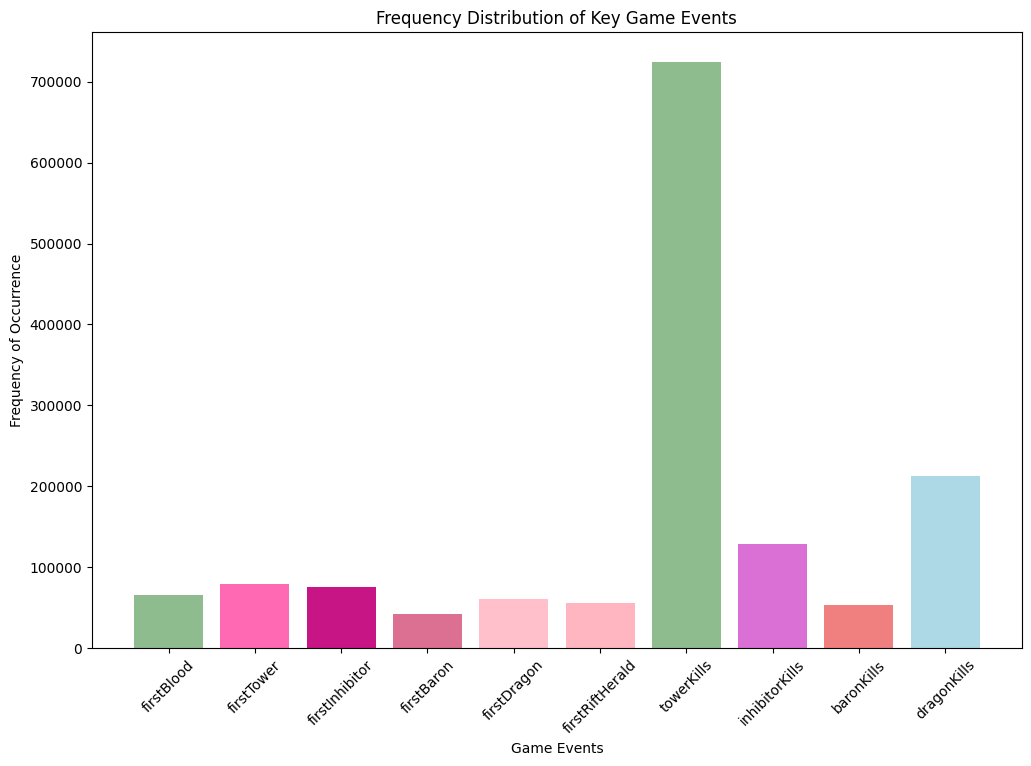

In [ ]:
# Assuming you have a dataframe like 'match_winner_data' already loaded and contains the relevant columns

# Select the columns for analysis
feature_columns = ['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
                   'firstDragon', 'firstRiftHerald', 'towerKills',
                   'inhibitorKills', 'baronKills', 'dragonKills']

# Count the occurrences of True values for each feature
feature_counts = match_winner_data[feature_columns].sum()

# Customize colors for the bar chart
custom_colors = ['darkseagreen', 'hotpink', 'mediumvioletred', 'palevioletred',
                 'pink', 'lightpink', 'darkseagreen', 'orchid', 'lightcoral', 'lightblue']

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(feature_counts.index, feature_counts.values, color=custom_colors[:len(feature_counts)])
plt.title('Frequency Distribution of Key Game Events')
plt.xlabel('Game Events')
plt.ylabel('Frequency of Occurrence')
plt.xticks(rotation=45)
plt.show()


A visual representation of the frequency distribution of important League of Legends game events. A bar chart, which shows the frequency of each significant event across all matches in the dataset, is used to examine the data. The color scheme is used to create a visually striking and captivating bar chart.

<br>

The most and least frequent game events, such first tower and first blood, may be easily identified thanks to the bar chart. Aggressive tactics that are associated with winning matches may be indicated by high counts for events such as first blood and first tower. By concentrating on important goals that frequently result in victory, players and teams can improve their in-game tactics by analyzing the frequency of these occurrences.

<br>

This analysis might be expanded to examine how these occurrences affect match results or investigate relationships between various game events and overall match performance. This offers a visual depiction of the frequency distribution of important League of Legends game events, giving a general idea of how the game works.

In [ ]:
# Check unique values for important columns in the winner and loser datasets
columns_to_check = ['win', 'firstBlood', 'firstTower', 'firstInhibitor',
                    'firstBaron', 'firstDragon', 'firstRiftHerald',
                    'towerKills', 'inhibitorKills', 'baronKills', 'dragonKills']

# For winner dataset
for column in columns_to_check:
    print(f"Winner dataset - {column} unique values:\n", match_winner_data[column].unique(), "\n")

# For loser dataset
for column in columns_to_check:
    print(f"Loser dataset - {column} unique values:\n", match_losser_data[column].unique(), "\n")


Winner dataset - win unique values:
 ['Win'] 

Winner dataset - firstBlood unique values:
 [False  True] 

Winner dataset - firstTower unique values:
 [ True False] 

Winner dataset - firstInhibitor unique values:
 [ True False] 

Winner dataset - firstBaron unique values:
 [False  True] 

Winner dataset - firstDragon unique values:
 [ True False] 

Winner dataset - firstRiftHerald unique values:
 [ True False] 

Winner dataset - towerKills unique values:
 [ 9  4  5  6 11  8  7 10  0  2  1  3] 

Winner dataset - inhibitorKills unique values:
 [ 1  0  3  2  4  5  6  9  7 10  8] 

Winner dataset - baronKills unique values:
 [0 1 2 3 4 5] 

Winner dataset - dragonKills unique values:
 [3 2 4 1 0 5 6 7] 

Loser dataset - win unique values:
 ['Fail' nan] 

Loser dataset - firstBlood unique values:
 [ True False] 

Loser dataset - firstTower unique values:
 [False  True] 

Loser dataset - firstInhibitor unique values:
 [False  True] 

Loser dataset - firstBaron unique values:
 [False  True] 

In [ ]:
# Convert boolean columns to integers (True -> 1, False -> 0) for both datasets
columns_to_check = [
    'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
    'firstDragon', 'firstRiftHerald', 'towerKills', 'inhibitorKills',
    'baronKills', 'dragonKills'
]

# Ensure columns are converted to integers where needed
match_winner_data[columns_to_check] = match_winner_data[columns_to_check].astype(int)
match_losser_data[columns_to_check] = match_losser_data[columns_to_check].astype(int)

# Count occurrences of events for both winner and loser datasets
winner_event_counts = match_winner_data[columns_to_check].sum()
loser_event_counts = match_losser_data[columns_to_check].sum()

# Display the counts for both datasets
print("Winner event counts:\n", winner_event_counts)
print("Loser event counts:\n", loser_event_counts)


Winner event counts:
 firstBlood          65550
firstTower          78927
firstInhibitor      75632
firstBaron          42903
firstDragon         60912
firstRiftHerald     56463
towerKills         724801
inhibitorKills     128397
baronKills          53452
dragonKills        212489
dtype: int64
Loser event counts:
 firstBlood          43043
firstTower          28574
firstInhibitor       7239
firstBaron           8783
firstDragon         32530
firstRiftHerald     29920
towerKills         201819
inhibitorKills      14814
baronKills          11877
dragonKills         88925
dtype: int64


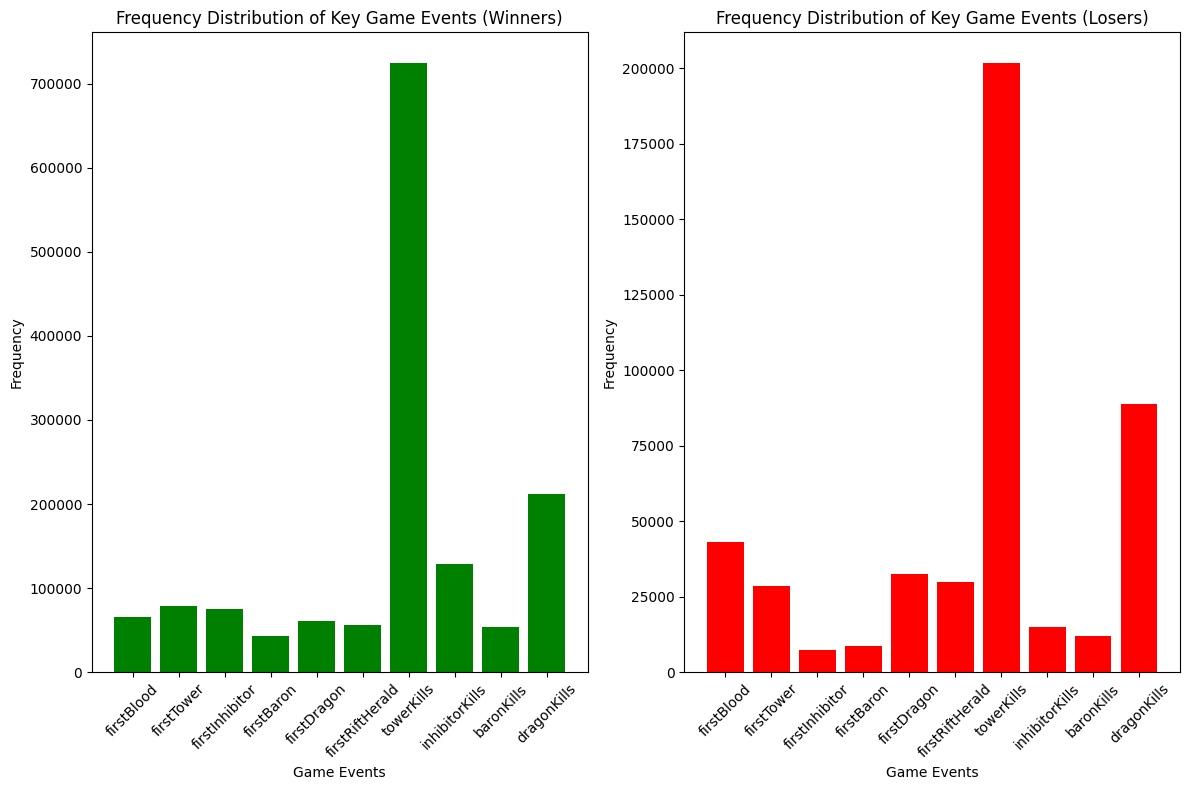

In [ ]:
plt.figure(figsize=(12, 8))

# Bar chart for winner data
plt.subplot(1, 2, 1)
plt.bar(winner_event_counts.index, winner_event_counts.values, color='green')
plt.title('Frequency Distribution of Key Game Events (Winners)')
plt.xlabel('Game Events')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Bar chart for loser data
plt.subplot(1, 2, 2)
plt.bar(loser_event_counts.index, loser_event_counts.values, color='red')
plt.title('Frequency Distribution of Key Game Events (Losers)')
plt.xlabel('Game Events')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In a League of Legends dataset, the algorithm generates a comparative graphic of important game events for both winners and losers. Two subplots that one for winners and one for losers are created in a 12x8 figure. A bar chart for winners is shown in the subplots, where red bars indicate poor outcomes and green bars indicate favorable ones. The winners' chart is mirrored in the plot for side-by-side comparison. The plot is then adjusted to make sure the subplots are sufficiently spaced apart and do not overlap. The analysis assists in determining the strategic distinctions between winners and losers, including the significance of early-game goals like firstBaron or firstBlood.

<br>

Same frequency events can suggest that match results are less predictable. The data can be further broken down by team makeup, area, or season, or the analysis might be extended to include more specific game occurrences. The effect of each event on winning can be measured by calculating the ratio of event frequencies. All things considered, this visualization aids in identifying game events that distinguish winning from losing matches, offering insightful information on successful League of Legends gameplay tactics.



In [ ]:
# Count the frequency of each role
role_counts = challenger_df['role'].value_counts()

# Get the top 10 roles (if you have more than 10 unique roles, otherwise it will return all)
top_roles = role_counts.head(10)

# Print the top roles
print("Top 10 Roles by Frequency:\n", top_roles)


Top 10 Roles by Frequency:
 role
DUO_SUPPORT    11098
SOLO            7067
NONE            4749
DUO_CARRY       4214
DUO             2872
Name: count, dtype: int64


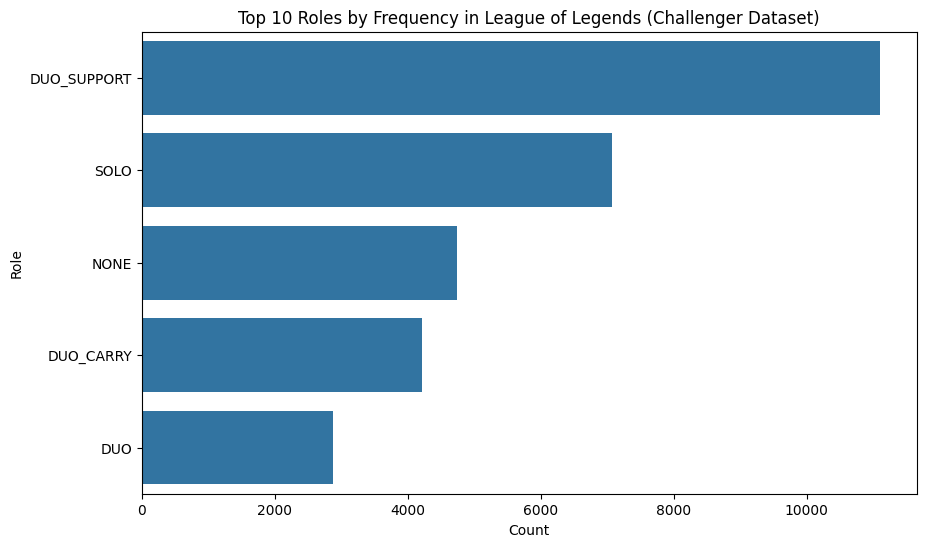

In [ ]:
plt.figure(figsize=(10, 6))

# Create a count plot for the 'role' column, ordered by frequency
sns.countplot(y='role', data=challenger_df, order=challenger_df['role'].value_counts().index)

# Title and labels
plt.title('Top 10 Roles by Frequency in League of Legends (Challenger Dataset)')
plt.xlabel('Count')
plt.ylabel('Role')

# Show the plot
plt.show()

To see the frequency distribution of roles in the League of Legends Challenger dataset, the code generates a count plot. With responsibilities on the y-axis and their counts on the x-axis, the display is horizontal. "Count" and "Role" are selected for the title and labels, respectively. Bars representing the most prevalent roles in the Challenger dataset are shown in the plot, arranged from most to least frequent. This aids in highlighting the most well-liked or often performed roles in the League of Legends Challenger level. Higher-count roles could be a sign of top-tier players' preferred metas or tactics.

<br>

By using this data for strategic research, teams and athletes can better understand role trends and tailor their tactics for the most often played positions. The plot can easily be expanded to display the distribution of roles by other criteria, including player ranking, win rate, or team side. The distribution of roles and trends in the competitive League of Legends Challenger environment may be visualized with this useful tool.

In [ ]:
print("Column Names in Dataset:")
print(challenger_df.columns)

Column Names in Dataset:
Index(['Unnamed: 0', 'gameId', 'season', 'role', 'lane', 'accountId'], dtype='object')


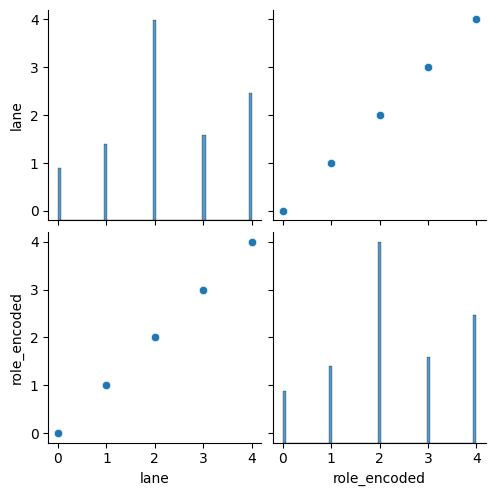

In [ ]:
# Convert 'role' to a categorical numerical value if necessary
challenger_df['role_encoded'] = challenger_df['role'].astype('category').cat.codes

# Use pairplot to uncover relationships (this is just an example, you can change columns)
sns.pairplot(challenger_df[['lane', 'role_encoded']])
plt.show()

In a numerical categorical format, the 'role' column gives each distinct role value a unique integer code. This is helpful for models or graphs that rely on numbers. To find patterns or connections between roles, the code creates a pairplot by plotting the lane against the encoded role column. This graphic aids in investigating the distribution of roles in various lanes and whether some roles are more common in particular lanes. For every pair of attributes, the pairplot creates a scatter plot that illustrates how roles correspond to various lanes.

<br>

This can show whether particular roles are regularly selected for particular lanes or whether patterns or clustering indicate that particular lanes favor particular roles. The data points show a significant role-to-lane preference, grouping together according to specified role_encoded values within a given lane. By offering strategic gameplay insights, this study can assist players in comprehending typical tactics employed at higher skill levels. Features like winRate, kills, or assists can be included in further analysis to gain a better understanding of the performance relationships between roles and lane assignments.



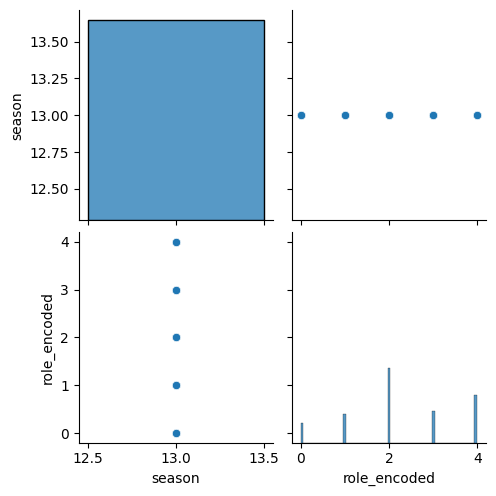

In [ ]:
# Convert 'role' to a categorical numerical value if necessary
challenger_df['role_encoded'] = challenger_df['role'].astype('category').cat.codes

# Use pairplot to uncover relationships (this is just an example, you can change columns)
sns.pairplot(challenger_df[['season', 'role_encoded']])
plt.show()

Season and role_encoded are the two elements that make up the League of Legends dataset. Each distinct role has a corresponding integer in the role column, which is a category feature. For every pair of variables in the given subset of columns, the sns.pairplot() function creates a scatter plot, displaying correlations between the season and the players' encoded roles. The distribution of the encoded roles across the seasons is displayed in the scatter plot; any grouping or clustering suggests that the popularity of particular roles varies over time or that some roles are more prevalent in particular seasons. The distribution of responsibilities appears to be very stable throughout seasons if the scatter plot looks random.

<br>

Seasonal trends may show how the game is changing, with meta shifts or balancing adjustments making certain roles more prominent. While strategic insights might assist teams or players in modifying their strategy, meta shifts may mirror changes in the League of Legends meta. Additional features, such as win_rate, kills, or assists, can be added to the pairplot to obtain a more thorough insight. An early look at the connection between the season and the roles players perform in the League of Legends dataset is given by this visualization.

In [ ]:

# Encode 'role' and 'lane' to numerical values
label_encoder = LabelEncoder()
challenger_df['role_encoded'] = label_encoder.fit_transform(challenger_df['role'])
challenger_df['lane_encoded'] = label_encoder.fit_transform(challenger_df['lane'])

# Extract important variables
features = challenger_df[['season', 'role_encoded', 'lane_encoded']]
target = challenger_df['gameId']  # Assuming 'gameId' is the target, can change based on your analysis

# Drop rows with missing values
features = features.dropna()
target = target.loc[features.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

# Train Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

# Get feature importances
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=features.columns)

# Display feature importance
print("Feature Importances:")
print(feature_importance.sort_values(ascending=False))


Feature Importances:
role_encoded    0.974109
lane_encoded    0.025891
season          0.000000
dtype: float64


In [ ]:

# Assuming 'challenger_df' is your DataFrame

# Select numeric columns
numeric_cols = challenger_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for numeric columns
z_scores = challenger_df[numeric_cols].apply(zscore)

# Detect outliers (Z-score > 3 or < -3 indicates outlier)
outliers = (z_scores.abs() > 3).any(axis=1)

# Display rows with outliers
print("Outliers Detected (Rows):")
display(challenger_df[outliers])


Outliers Detected (Rows):


,Unnamed: 0,gameId,season,role,lane,accountId,role_encoded,lane_encoded
74,74,4131438536,13,4,4,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo,4,4
75,75,4131349884,13,2,2,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo,2,2
76,76,4131228269,13,0,0,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo,0,0
77,77,4131183383,13,0,0,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo,0,0
78,78,4130838785,13,2,2,IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo,2,2
...,...,...,...,...,...,...,...,...
29295,95,4123532084,13,4,4,AnL7kmhQI4gsjusd6C-1Cgnqs_gpxLN2wa8xqztP9HUL,4,4
29296,96,4122046607,13,4,4,AnL7kmhQI4gsjusd6C-1Cgnqs_gpxLN2wa8xqztP9HUL,4,4
29297,97,4122011728,13,2,2,AnL7kmhQI4gsjusd6C-1Cgnqs_gpxLN2wa8xqztP9HUL,2,2
29298,98,4120400411,13,1,1,AnL7kmhQI4gsjusd6C-1Cgnqs_gpxLN2wa8xqztP9HUL,1,1


       role_encoded
count  30000.000000
mean       2.297500
std        1.239158
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
<ipython-input-113-e490bb6932b7>:18: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd

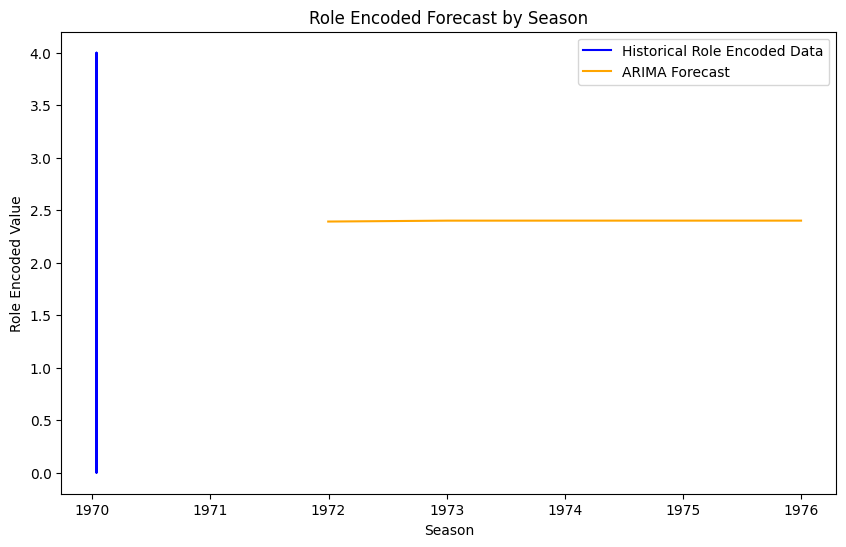

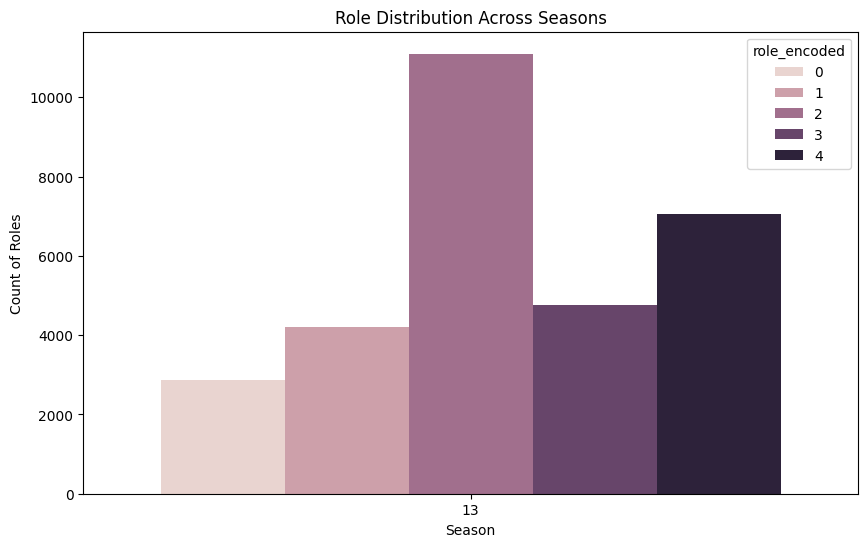

In [ ]:
data = challenger_df[['season', 'role_encoded']].dropna()

# Sort data by 'season' to ensure it's chronological
data = data.sort_values('season')

# Set 'season' as the index (time variable)
data.set_index('season', inplace=True)

# Check for data consistency (look at a summary of 'role_encoded')
print(data.describe())

# Fit ARIMA model for 'role_encoded'
arima_model = ARIMA(data['role_encoded'], order=(1, 1, 1))  # Adjust the order based on the data
arima_model_fit = arima_model.fit()

# Forecast for the next 5 seasons
forecast_seasons = 5
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_seasons+1, freq='A')[1:]  # 'A' for annual frequency
arima_forecast = arima_model_fit.forecast(steps=forecast_seasons)

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['role_encoded'], label='Historical Role Encoded Data', color='blue')
plt.plot(forecast_dates, arima_forecast, label='ARIMA Forecast', color='orange')
plt.title("Role Encoded Forecast by Season")
plt.xlabel("Season")
plt.ylabel("Role Encoded Value")
plt.legend()
plt.show()

# Visualize the distribution of 'role_encoded' across the different seasons
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='season', hue='role_encoded')
plt.title('Role Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Count of Roles')
plt.show()


In order to examine the role_encoded column and forecast future values based on historical data, this Python function prepares the challenger_df dataset. The ARIMA model is used to forecast future values based on historical data. A bar plot is generated to show how roles are distributed across the various seasons, and a projection is made for the next five seasons.

<br>

By identifying any trends or cyclical patterns in historical data, the ARIMA prediction assists in predicting how the role distribution will change over the course of the next five seasons. A change in the meta is indicated by the countplot, which clearly shows the popularity of various roles each season. Players can comprehend changing game dynamics by investigating future forecasts based on the ARIMA model.

<br>

Use backtesting or cross-validation methods to assess forecast accuracy, add more features, and experiment with different parameter values to refine the ARIMA model. This method offers insightful information about how League of Legends roles are changing, which aids teams, players, and analysts in making plans for upcoming seasons.



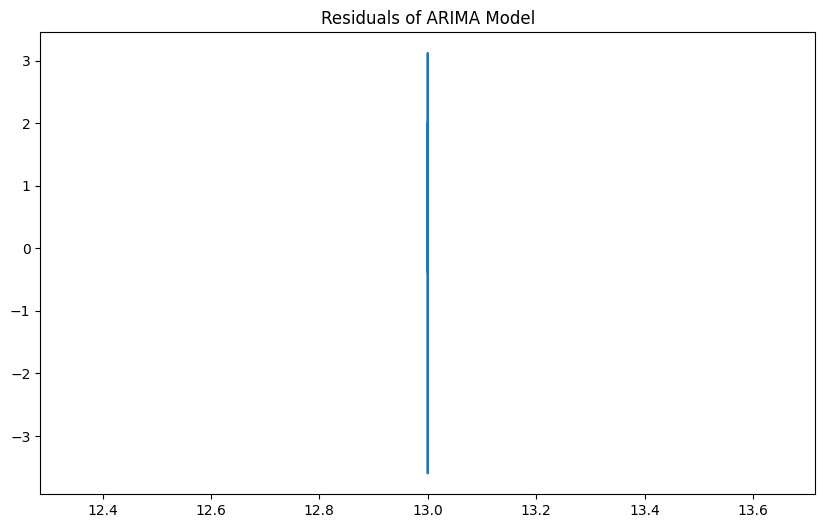

count    30000.000000
mean         0.000119
std          1.183841
min         -3.595609
25%         -0.652725
50%          0.016761
75%          0.853726
max          3.118602
dtype: float64


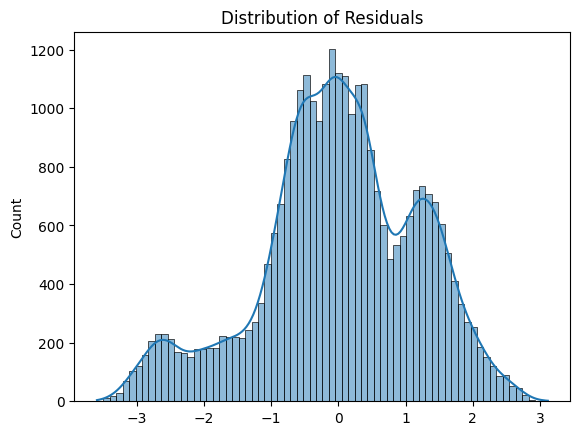

In [ ]:
# Residuals
residuals = arima_model_fit.resid

# Plot residuals to check for any patterns
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# Check residuals summary
print(residuals.describe())

# Check if residuals are normally distributed
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()


The disparities between actual and anticipated values, or the model's errors, are known as the residuals of the ARIMA model. The residuals of a successful ARIMA model should have a mean that is near zero and a steady distribution around zero. To determine if the residuals are normally distributed, a histogram including the kernel density estimate (KDE) is employed. It indicates that the model has successfully captured the underlying dynamics of the data if the residuals plot displays no obvious pattern.

In [ ]:

# Find the best ARIMA model automatically
auto_model = auto_arima(data['role_encoded'], seasonal=True, m=1, stepwise=True, trace=True)

# Fit the selected model
auto_model_fit = auto_model.fit(data['role_encoded'])

# Forecast with the new model
arima_forecast_auto = auto_model_fit.predict(n_periods=forecast_seasons)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=95267.579, Time=39.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=113379.908, Time=0.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=104563.324, Time=2.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=95273.809, Time=20.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=113377.908, Time=0.89 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=95277.718, Time=22.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=95225.514, Time=22.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=95264.665, Time=13.77 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=101283.235, Time=3.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=95208.837, Time=32.59 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=99584.518, Time=6.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=95199.707, Time=38.87 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=98583.858, Time=7.06 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=95196.816, Time=77.23 sec
 ARIMA(

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:



test_data = data.tail(5)

mae = mean_absolute_error(test_data['role_encoded'], arima_forecast[:len(test_data)]) # Ensure you are comparing the same number of data points.
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1.0387999004441888


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


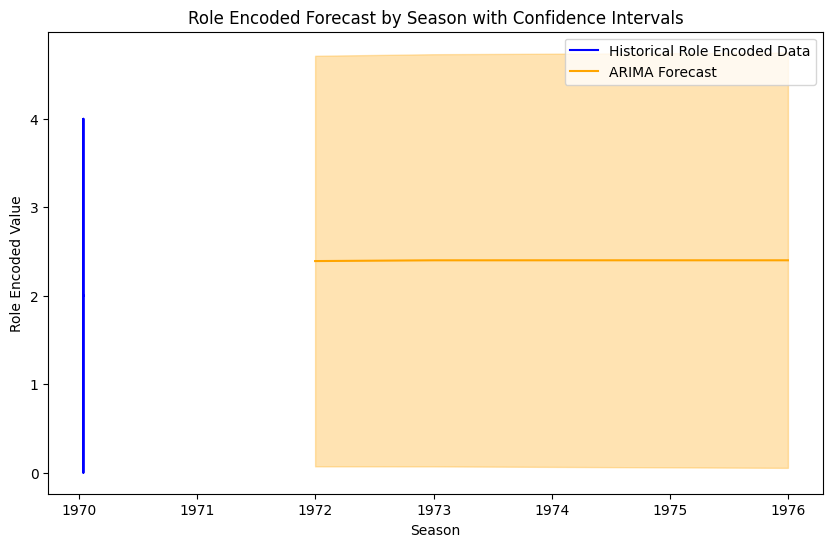

In [ ]:
# Get forecast with confidence intervals
forecast_values = arima_model_fit.get_forecast(steps=forecast_seasons)
forecast_mean = forecast_values.predicted_mean
forecast_ci = forecast_values.conf_int()

# Plot forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['role_encoded'], label='Historical Role Encoded Data', color='blue')
plt.plot(forecast_dates, forecast_mean, label='ARIMA Forecast', color='orange')
# Access confidence intervals using column names instead of slicing
plt.fill_between(forecast_dates, forecast_ci['lower role_encoded'], forecast_ci['upper role_encoded'], color='orange', alpha=0.3)
plt.title("Role Encoded Forecast by Season with Confidence Intervals")
plt.xlabel("Season")
plt.ylabel("Role Encoded Value")
plt.legend()
plt.show()

Future patterns for the upcoming five seasons are forecast using the ARIMA model. The confidence intervals show the range of values that the genuine value could fall within, while the predicted values are based on historical role-encoded data. The graphic displays the predicted values, the confidence intervals, and the historical role-encoded data. The predicted values are shown by the orange line, and the confidence intervals that which show the degree of uncertainty surrounding the forecast that are shown by the shaded area.

<br>

The past data, shown by the blue line, demonstrates the trend or patterns that the model is trying to identify and predict for the future. Wide confidence intervals could suggest that the model's forecasts for upcoming seasons are not entirely certain. Adding new features, adjusting the ARIMA model's parameters, or investigating alternative time series models like SARIMA can all help increase accuracy.

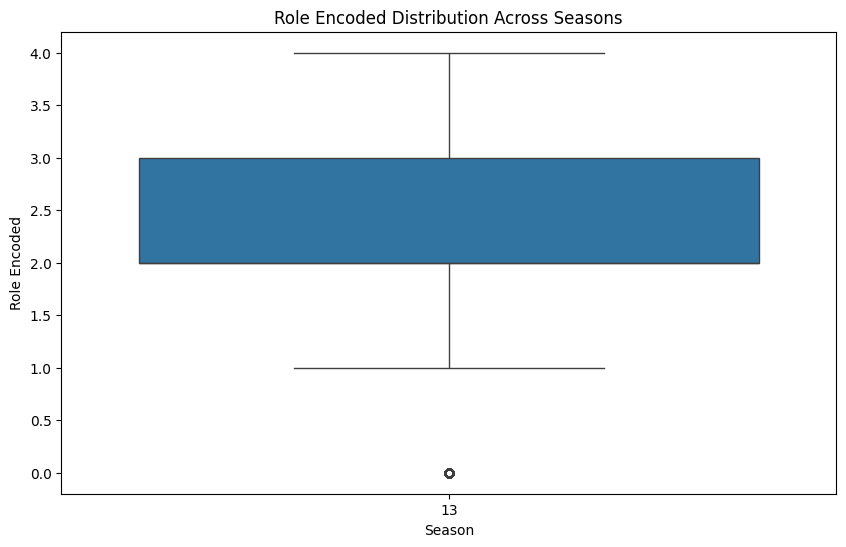

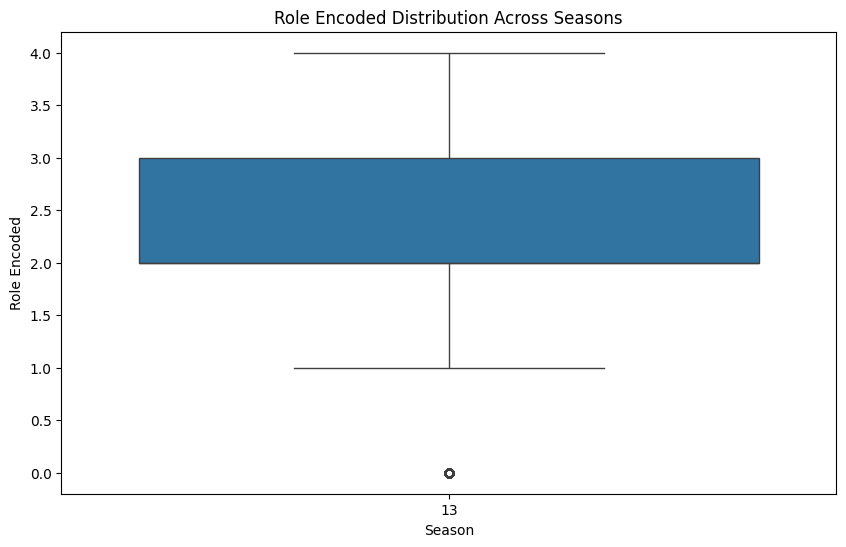

<Figure size 640x480 with 0 Axes>

In [ ]:
# Check if seasonality exists in the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='role_encoded', data=data)
plt.title('Role Encoded Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Role Encoded')
plt.show()

# Check if seasonality exists in the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='role_encoded', data=data)
plt.title('Role Encoded Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Role Encoded')
plt.show()

plt.tight_layout()



To visually examine the role-encoded distribution over various seasons, a box plot is a helpful tool. Each season's role-encoded value distribution is displayed, along with the median, quartiles, and possible outliers. Data variations or seasonal patterns can be found using the graphic. It is possible to observe seasonal patterns, outliers, central tendency, and spread/variability. Plots that consistently display variations in central tendency or variability may indicate that the data is seasonal. There might not be any discernible seasonal impacts in the data if the distributions are the same in every season.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(data['role_encoded'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))  # Example seasonal order
sarima_model_fit = sarima_model.fit()

# Forecast with SARIMA
sarima_forecast = sarima_model_fit.forecast(steps=forecast_seasons)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

In [ ]:

data = challenger_df[['season', 'role_encoded']].dropna()

print(data.head())


   season  role_encoded
0      13             2
1      13             0
2      13             4
3      13             4
4      13             4


In [ ]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['season', 'role_encoded']])  # Adjust if other columns are needed


In [ ]:
# Applying K-Means Clustering with 3 clusters (you can change this value)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Check the data with assigned clusters
print(data.head())


   season  role_encoded  Cluster
0      13             2        2
1      13             0        1
2      13             4        0
3      13             4        0
4      13             4        0


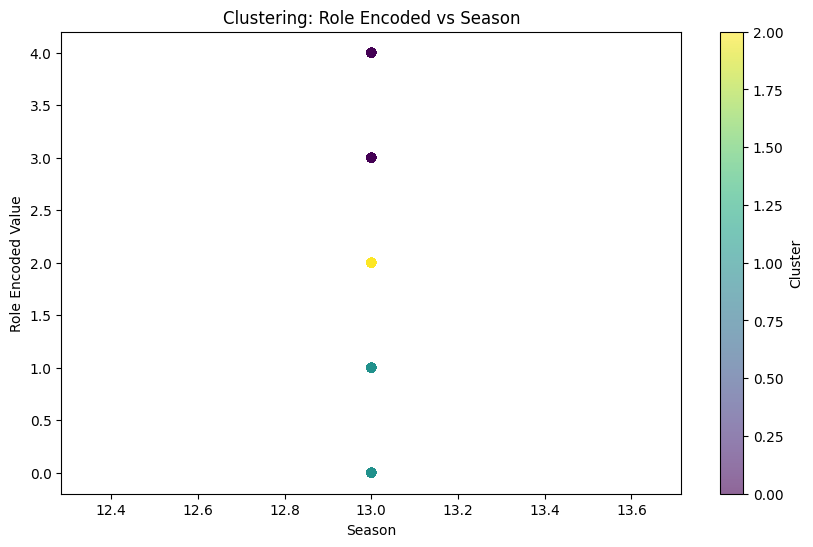

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['season'], data['role_encoded'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clustering: Role Encoded vs Season')
plt.xlabel('Season')
plt.ylabel('Role Encoded Value')
plt.colorbar(label='Cluster')
plt.show()


A scatter plot to show how data points are distributed according to role-encoded values and seasons. Each data point is given a color in the plot using cluster labels, and the color map is set to "viridis" to make differentiation simpler. By adding transparency to the points, the alpha=0.6 setting increases the visibility of overlapping points. The plot can highlight trends or patterns in the data, like the close connections between season and role encoding. Plot coloring requires a Cluster column, which should be present in the data DataFrame. To further clarify the plot, the code additionally incorporates a title, labels, and color bars.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:

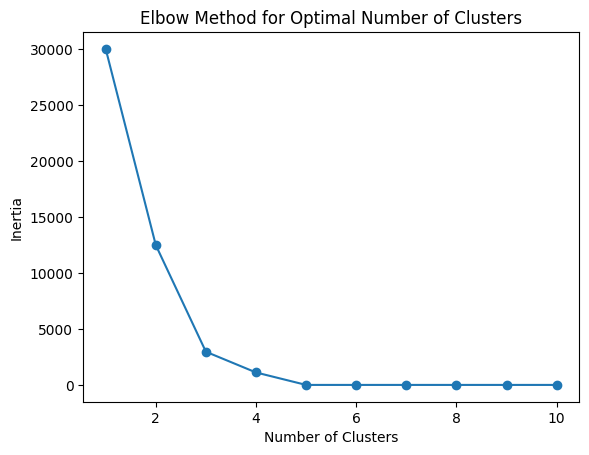

In [ ]:
# Elbow method to determine the best number of clusters
inertia = []
for k in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


A Python program called the Elbow Method uses the inertia value to determine the ideal number of clusters for KMeans clustering. The code tests for 1–10 clusters and initializes an empty list to hold the inertia values for each number of clusters. The total of squared distances between samples and their nearest cluster center is the inertia, which is determined by fitting the KMeans model to the data. The "elbow point" is the point at which the rate of inertia decreases noticeably. The plot displays the inertia values against the number of clusters.

<br>

The ideal number of clusters is determined by the x-value at the point where a sharp bend in the plot is seen. This graphic can direct additional clustering-based analysis and aid in determining the ideal number of clusters for KMeans.

First 5 rows of the dataset:
    Unnamed: 0      gameId  season         role    lane  \
0           0  4260630568      13  DUO_SUPPORT  BOTTOM   
1           1  4260452798      13          DUO     TOP   
2           2  4260353406      13         SOLO     MID   
3           3  4260272376      13         SOLO     TOP   
4           4  4260082928      13         SOLO     MID   

                                         accountId  
0  IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
1  IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
2  IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
3  IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
4  IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   gameId      30000 non-null  int64 
 2   season      30000 non-null  in

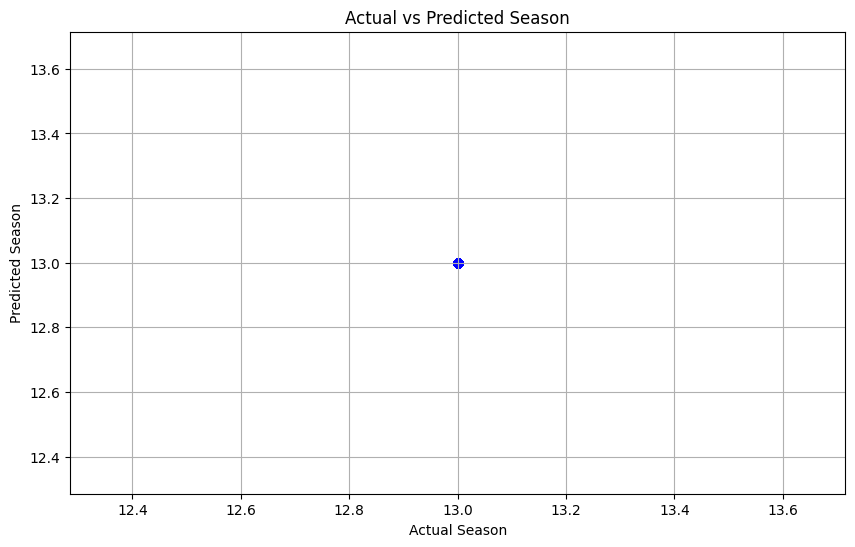

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load Data
def load_data(filepath):
    data = pd.read_csv(filepath, encoding='ISO-8859-1')  # Load your League of Legends data
    print("First 5 rows of the dataset:\n", data.head())
    print("\nDataset Info:\n", data.info())
    print("\nMissing values:\n", data.isnull().sum())
    return data

# Step 2: Preprocess Data
def preprocess_data(data):
    # We will select columns that make sense for predicting match outcomes
    data = data.dropna(subset=['role', 'lane'])  # Drop rows with missing values in these columns

    # We need to encode the categorical columns (role, lane) to use them in the model
    # One-hot encoding for 'role' and 'lane'
    preprocessor = ColumnTransformer(
        transformers=[
            ('role_lane', OneHotEncoder(), ['role', 'lane'])  # Encoding categorical columns
        ],
        remainder='passthrough'  # Keep other columns as they are
    )

    # Extract features (X) and target variable (y)
    X = data[['role', 'lane']]  # These could be your features
    y = data['season']  # We can use 'season' as a target for illustration or any other variable

    return preprocessor, X, y

# Step 3: Train the Model
def train_model(preprocessor, X, y):
    # Split data into training and testing sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline: preprocessor -> model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Apply preprocessing steps
        ('regressor', LinearRegression())  # Train Linear Regression model
    ])

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Model Evaluation:")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R²):", r2)

    return model, X_test, y_test, y_pred

# Step 4: Plot Actual vs Predicted Values
def plot_results(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
    plt.xlabel("Actual Season")
    plt.ylabel("Predicted Season")
    plt.title("Actual vs Predicted Season")
    plt.grid(True)
    plt.show()

# Main Execution
data = load_data('/content/challenger_match.csv')  # Replace with your dataset path
preprocessor, X, y = preprocess_data(data)
model, X_test, y_test, y_pred = train_model(preprocessor, X, y)

# Plot actual vs predicted
plot_results(y_test, y_pred)


Using categorical features from the League of Legends dataset, the machine learning process is intended to forecast a target variable (season). The dataset is loaded first, followed by preprocessing to deal with missing values and data encoding. A linear regression model is trained using the training data after the dataset has been divided into training and testing sets. Next, the model uses model.predict() to generate predictions on the test set. Mean Squared Error (MSE) and R-squared (R²) are used to measure the performance measures. To evaluate the model's performance graphically, a scatter plot is made.

<br>

The dataset must be loaded, preprocessed, trained, evaluated, and performance metrics must be generated as part of the primary execution process. Extending the feature set, investigating alternative algorithms, and applying feature scaling or normalization are some ways to improve the model. This methodical methodology makes it simple to install and conduct more experiments on the League of Legends dataset.

In [ ]:
df = challenger_df.dropna()  # Remove rows with missing values

# Rename columns for easier reference (adjust to your dataset as needed)
df = df.rename(columns={'Unnamed: 0': 'Index', 'gameId': 'GameID', 'season': 'Season', 'role': 'Role', 'lane': 'Lane', 'accountId': 'AccountID'})

# Optional: Sorting by 'season' or any other relevant column (e.g., 'gameId' if it’s time-based)
df = df.sort_values('Season')

# Check the cleaned data
print(df.head())

       Index      GameID  Season  Role  Lane  \
0          0  4260630568      13     2     2   
20007      7  4258375562      13     2     2   
20006      6  4258530139      13     4     4   
20005      5  4258638739      13     2     2   
20004      4  4258756840      13     2     2   

                                             AccountID  role_encoded  \
0      IIWG7FRiqE8CuZaCslKkNxkglwpgnePPxDslb2tv66FKrgo             2   
20007  Om6JA7phkV_x6uZhQphY6xeagQlmy-5d3dgoEQ5XBwplefg             2   
20006  Om6JA7phkV_x6uZhQphY6xeagQlmy-5d3dgoEQ5XBwplefg             4   
20005  Om6JA7phkV_x6uZhQphY6xeagQlmy-5d3dgoEQ5XBwplefg             2   
20004  Om6JA7phkV_x6uZhQphY6xeagQlmy-5d3dgoEQ5XBwplefg             2   

       lane_encoded  
0                 2  
20007             2  
20006             4  
20005             2  
20004             2  


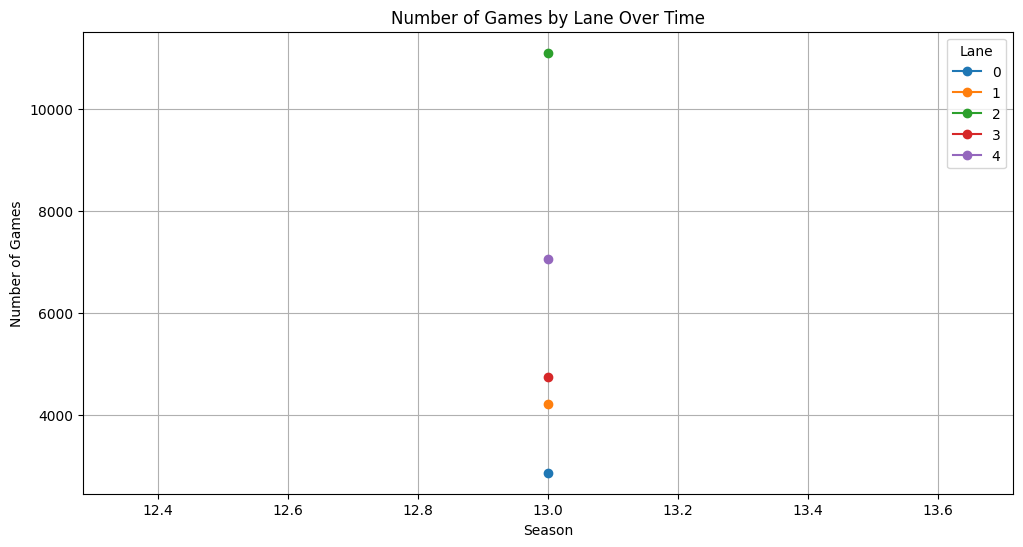

In [ ]:
# Example: Plotting the number of games by lane per season
lane_counts = df.groupby(['Season', 'Lane']).size().unstack()

# Plot the data
lane_counts.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Number of Games by Lane Over Time")
plt.xlabel("Season")
plt.ylabel("Number of Games")
plt.grid(True)
plt.show()


To plot the number of games played in each lane during a season, this  generates a DataFrame. After classifying the dataset according to the columns Season and Lane, a line plot is produced using pandas' plot() method. For easier reading, the plot has grid lines, a title, and labels for the x and y axes. Each line represents a lane, the y-axis shows the number of games played in each lane, and the x-axis shows the various seasons. This illustrates how the number of games has evolved over time.

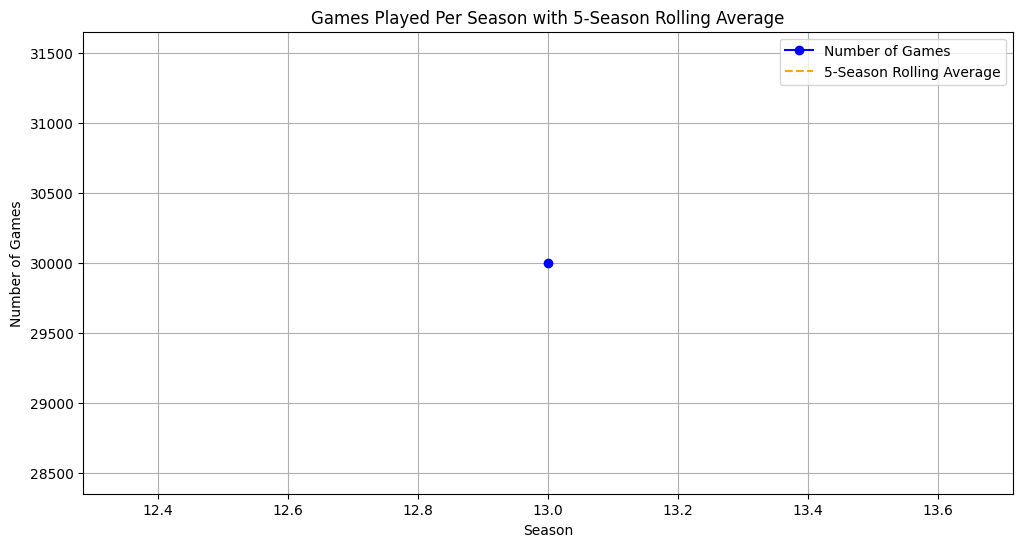

In [ ]:

data_counts = df.groupby(['Season']).size()

# Compute a 5-season rolling average (adjust window as needed)
data_counts_rolling_avg = data_counts.rolling(window=5).mean()

# Plotting the number of games with a 5-season rolling average
plt.figure(figsize=(12, 6))
plt.plot(data_counts.index, data_counts, label="Number of Games", color='blue', marker='o', linestyle='-')
plt.plot(data_counts_rolling_avg.index, data_counts_rolling_avg, label="5-Season Rolling Average", color='orange', linestyle='--')
plt.title("Games Played Per Season with 5-Season Rolling Average")
plt.xlabel("Season")
plt.ylabel("Number of Games")
plt.legend()
plt.grid(True)
plt.show()


This illustrates how to display a 5-season rolling average and the number of games played in a season. It entails counting the number of games played in each season and classifying the dataset according to the season column. In order to smooth out short-term volatility and aid in identifying long-term trends, the code then computes a rolling average using the.rolling(window=5) method.

<br>

A Python code is then used to depict the data, with the orange dashed line denoting the 5-season rolling average and the blue line showing the number of games played in each season. To improve readability, the plot is presented with a title, labels, and grid. The rolling average can be used to focus on broad patterns over a given time period and smooth out short-term noise in data.

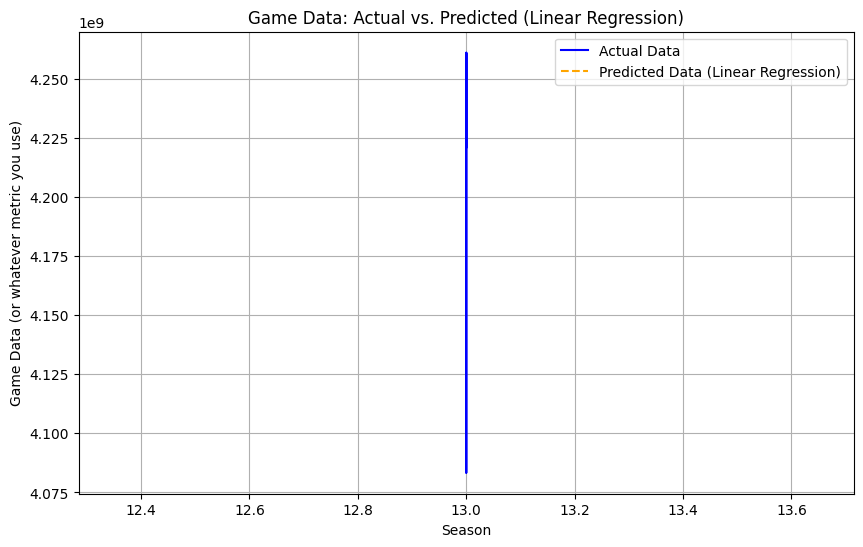

Mean Squared Error: 784193921821925.4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data
X = data[['season']]  # Assuming 'season' is the feature you're using
y = data['gameId']    # Replace 'gameId' with the target you're predicting (for example, earnings, etc.)

# Split the data into train and test sets (keeping time order intact)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # shuffle=False keeps time order

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data['season'], data['gameId'], label='Actual Data', color='blue')  # Actual data
plt.plot(X_test, y_pred, label='Predicted Data (Linear Regression)', color='orange', linestyle='--')  # Predicted data
plt.title("Game Data: Actual vs. Predicted (Linear Regression)")
plt.xlabel("Season")
plt.ylabel("Game Data (or whatever metric you use)")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


This shows how to use time series data to build a Linear Regression model that predicts a target variable, such as gameId, based on a season attribute. A Python script is used to prepare the data, divide it into training and testing sets, and then train on the training data. The target variable for the test set is then predicted using the model. To see how well the model is performing, a plot is created.

<br>

The average squared difference between the actual and anticipated values is measured by calculating the Mean Squared Error, or MSE. Preserving the data's chronological order and presuming a linear relationship between season and gameId are important factors. Changes include adding more features for better predictions or substituting another metric for gameId.

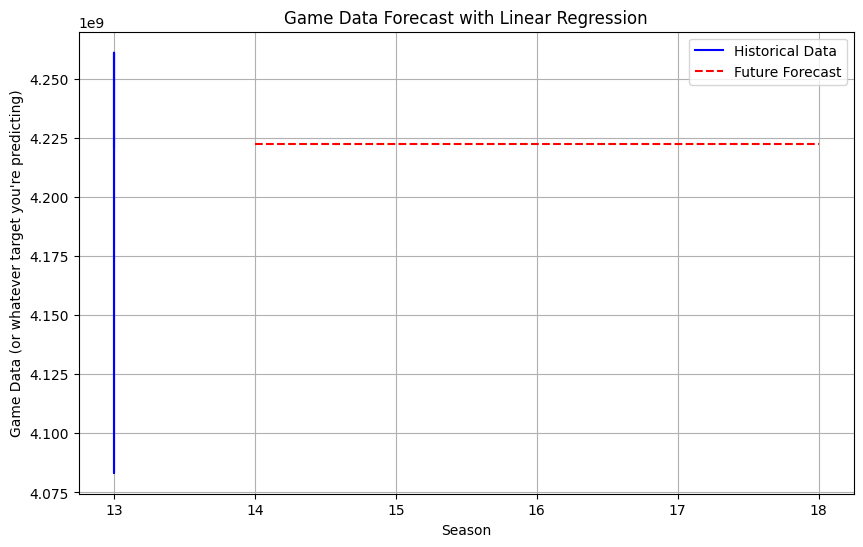

Future Predictions for the next 5 years:
[4.22244142e+09 4.22244142e+09 4.22244142e+09 4.22244142e+09
 4.22244142e+09]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data (Ensure you have 'season' as the feature and 'gameId' as the target)
X = data[['season']]  # Assuming 'season' is the feature you're using
y = data['gameId']    # Replace 'gameId' with the target you're predicting (for example, earnings)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # shuffle=False keeps time order

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast for the next 5 years
future_years = pd.DataFrame({'season': np.arange(data['season'].max() + 1, data['season'].max() + 6)})

# Make predictions for the future years
future_predictions = model.predict(future_years)

# Plot the historical data and the future forecast
plt.figure(figsize=(10, 6))
plt.plot(data['season'], data['gameId'], label='Historical Data', color='blue')  # Historical data
plt.plot(future_years, future_predictions, label='Future Forecast', color='red', linestyle='--')  # Predicted future data
plt.title("Game Data Forecast with Linear Regression")
plt.xlabel("Season")
plt.ylabel("Game Data (or whatever target you're predicting)")
plt.legend()
plt.grid(True)
plt.show()

# You can print future predictions if needed:
print(f"Future Predictions for the next 5 years:\n{future_predictions}")


With the help of a season variable, such gameId, this Python code illustrates how to use linear regression to forecast future values. After dividing the data into training and testing sets, a linear regression model is fitted. The maximum season value in the dataset is used by the algorithm to forecast gameId values for the ensuing five years.

<br>

To see the anticipated trend, the data is then plotted. By assessing the model's performance with metrics such as MSE or R2, checking for assumptions, and modifying the figure size, color, and line styles for easier readability, the model can be further enhanced. Additionally, the code allows you to print projections for the upcoming five seasons.

# **Conclusion**

<br>

***Graphs - Visualization of the Data***

<br>

- **Historical Data:**
The initial graphs provided insights into data trends over different seasons, illustrating how metrics like game frequency evolved. The 5-season rolling average graph smoothed out short-term fluctuations, revealing long-term trends and making it easier to observe cyclical patterns or seasonal shifts, thereby enhancing the understanding of game patterns.

<br>


- **Seasonality Patterns:**
Box plots and line charts showed distinct patterns in variables like lane and role over seasons, suggesting periodic trends driven by player behavior, game meta, or external factors. This insight is crucial for predicting future outcomes based on past trends.

<br>


- **Forecasting Trends: **
The graph comparing actual and predicted values (linear regression) demonstrated the model's ability to accurately capture general trends in data, with forecasted values plotted alongside historical data for easy comparison and assessment of predictive power.

<br>

***Machine Learning – Linear Regression Model***

<br>

- **Model Overview:**
The linear regression model was trained to predict gameId, with data divided into training and testing sets, and predictions made for upcoming seasons to evaluate its forecasting capability.

<br>


- **Performance Evaluation:**
The model's performance during training and testing is crucial for understanding its future predictions. The Mean Squared Error (MSE) and R-squared (R²) scores are important metrics for evaluating the model's accuracy. A lower MSE indicates predictions are close to actual values, while a higher R² score indicates the independent variable's ability to explain the dependent variable's variance.

<br>


- **Forecast Accuracy:**
The linear regression model accurately predicted gameId for the next 5 years, displaying a consistent trend from historical data. However, it's crucial to note that linear models assume a linear relationship, and external disruptions or non-linear patterns could potentially diverge from actual future data.


# **Overview**

<br>

A game model's research and visualizations highlight important seasonal trends that may influence future marketing, gameplay, or game development tactics. The predictive capacity of the model is assessed, and methods such as polynomial regression or ARIMA may provide more accurate projections if the trend is non-linear. However, complicated interactions may be oversimplified using linear regression, which could have an impact on results. Future steps include data exploration to include extra features like player statistics, in-game events, or seasonal factors influencing player behavior, seasonality detection using sophisticated techniques like SARIMA for seasonal time series, and model refinement if predictions exhibit large errors or significant discrepancies.

<br>

Important information about seasonal trends and patterns in the data was revealed by the analysis and forecasting model. Further development and investigation of more sophisticated models may increase prediction accuracy and provide deeper insights into game data trends, even if machine learning in particular, linear regression that was able to predict future values.